# Self-Organizing Map
## Ex 14.5 of Elements of Statistical Learning

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# define SOM
class SOM_2D(object):
    
    def __init__(self):
        self.Map = {}
        self.Error = []

    
       
    # train a map
    def train(self, X, q1, q2, n_iter, R):
        
        
        self.q1 = q1
        self.q2 = q2
        
        self.K = q1*q2
        self.n, self.p = X.shape
        
        # initialize Map with randomly selected observations
        selected = np.random.choice( range(self.n), self.K, False )
        index = 0
        for i in range(q1):
            for j in range(q2):
                
                self.Map[ (i+1,j+1) ] = X[ selected[ index ]  , : ]
                index += 1
                
        # training
        self.cluster_indicator = {}
        for iteration in range( n_iter ):
            r = R - (R-1)*iteration/n_iter
            alpha = ( n_iter - iteration )/n_iter
            
            i = iteration % self.n
            x = X[i, :]
            
            # find m
            l = self.find_l( x )
            self.cluster_indicator[ i ] = l # assign x to cluster l
            
            # update map
            for i in range(q1):
                for j in range(q2):
                    
                    d = np.sqrt( (l[0] - (i+1))**2 + (l[1]-(j+1))**2 )
                    if  d <= r :
                        self.Map[(i+1,j+1)] = self.Map[(i+1,j+1)] + alpha*( x - self.Map[(i+1,j+1)] )
            
            # update error
            if (iteration+1) % X.shape[0] == 0:
                self.Error.append( self.error(X) )


    # compute reconstruction error
    def error(self, X):
        error = 0
        for i in range( X.shape[0] ):
            l = self.cluster_indicator[i]
            m = self.Map[l]
            error += np.linalg.norm( X[i,:] - m  )**2
            
        return error
        
        

    # cluster X based on the trained map   
    def predict(self, X):
        predict = np.empty( [ X.shape[0] ,2] )
        for n in range( X.shape[0] ):
            l = self.find_l( X[n,] )
            predict[n,] = [ l[0], l[1] ]
            
        return predict
            
        
    
    
    def visualization(self, X, label):
        p = self.predict(X) + np.random.uniform( -0.1,0.1, [ X.shape[0] ,2] )
        
        plt.figure()
        plt.scatter( p[:,0], p[:,1], c = label, s=10, cmap = 'Set1')
        plt.title('Self-Organized Map')
        plt.show()
        
 


                       
    # find l that is closet to x
    def find_l(self, x):
    
        d_opt = np.Inf
        ans = (1,1)
        for i in range(self.q1):
            for j in range(self.q2):
                d = sum(  ( x  - self.Map[ (i+1,j+1) ] )**2  )
                if d < d_opt:
                    ans = (i+1, j+1)
                    d_opt = d
        return ans
                    
        

# simulated data    
def simu_data( theta, phi ):     
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    ans = np.stack( (x,y,z), axis = 1)
    ans += np.random.normal( 0, 0.6, [ len(theta), 3 ] )
    return ans
     

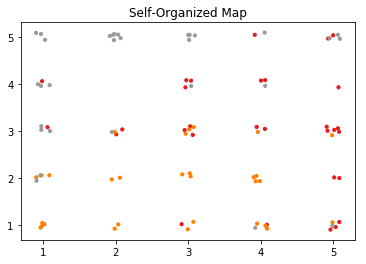

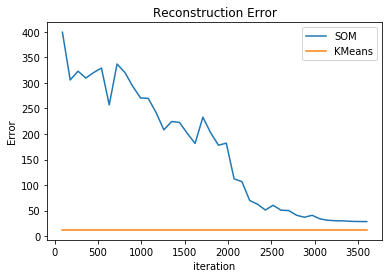

In [9]:
## main

# simulate data
n = 30

theta1 = np.random.uniform( -np.pi/8, np.pi/8, n)
phi1 = np.random.uniform(0, 2*np.pi, n)

theta2 = np.random.uniform( np.pi/4, 3*np.pi/4, n)
phi2 = np.random.uniform(-np.pi/4, np.pi/4, n)

theta3 = np.random.uniform( np.pi/4, 3*np.pi/4, n)
phi3 = np.random.uniform( np.pi/4, 3*np.pi/4, n)

theta = np.concatenate( (theta1, theta2, theta3), axis = 0 )
phi = np.concatenate( (phi1, phi2, phi3) )

X = simu_data( theta, phi ) # data
label = np.concatenate(  [ np.ones(n), 3*np.ones(n), 5*np.ones(n)  ] )  # color label


# SOM
n = X.shape[0]
n_iter = 3600
R = 2
q1 = 5
q2 = 5
som = SOM_2D()
som.train(X, q1, q2, n_iter, R)
som.visualization(X, label)


# KMeans
km = KMeans( 25 ).fit(X)
km_error = km.inertia_

# plots
plt.figure()
plt.plot( n*(np.arange(n_iter/n)+1), som.Error, label = 'SOM' )
plt.plot( n*(np.arange(n_iter/n)+1), km_error*np.ones( int(n_iter/n ) ), label = 'KMeans' )
plt.title('Reconstruction Error')
plt.xlabel('iteration')
plt.ylabel('Error')
plt.legend()
plt.show()

